In [79]:
import pandas as pd
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import SGDRegressor, LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import tree
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from math import *
from keras.optimizers import SGD

In [80]:
#load the tsv files of the features and respective responses
df=pd.read_csv('MP_Data.tsv', sep='\t', index_col=False)
tt_df=df.rename(columns={'x':'test_train'})

In [81]:
x_df=pd.read_csv('MP_Descriptors.tsv', sep='\t', index_col=False)

In [82]:
y_df_init=pd.read_csv('MP_Outcome.tsv', sep='\t')
y_df=y_df_init.rename(columns={'x':'outcome'})

In [83]:
#sort the data according to test and train sets
x_train_df=x_df[tt_df['test_train']=='Train']
x_test_df=x_df[tt_df['test_train']=='Test']

y_train_df=y_df[tt_df['test_train']=='Train']
y_test_df=y_df[tt_df['test_train']=='Test']

In [84]:
x_train_df.shape, y_train_df.shape, x_test_df.shape, y_test_df.shape

((4126, 202), (4126, 1), (275, 202), (275, 1))

In [85]:
#normalise the inputs
#x_scaler=StandardScaler()
#x_train=x_scaler.fit_transform(x_train_df)
#x_test=x_scaler.fit_transform(x_test_df)

In [86]:
#normalize the observations
y_scaler=StandardScaler()
y_train_norm=y_scaler.fit_transform(y_train_df)
y_test_norm=y_scaler.fit_transform(y_test_df)

In [88]:
#minmax standardization
y_minmax=MinMaxScaler()
y_train_mm=y_minmax.fit_transform(y_train_df)
y_test_mm=y_minmax.fit_transform(y_test_df)

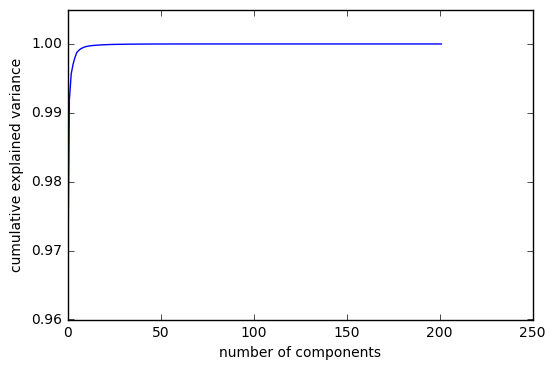

In [89]:
#feature selection
pca=PCA().fit(x_train_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [90]:
pca=PCA(n_components=30)#from the literature
x_train_pca=pca.fit_transform(x_train_df)
x_test_pca=pca.fit_transform(x_test_df)
x_train_pca.shape, x_test_pca.shape

((4126, 30), (275, 30))

In [91]:
#normalize the inputs
x_scaler=StandardScaler()
x_train_norm=x_scaler.fit_transform(x_train_pca)
x_test_norm=x_scaler.fit_transform(x_test_pca)
x_train_norm.shape, x_test_norm.shape

((4126, 30), (275, 30))

In [93]:
#minmax standardization
x_minmax=MinMaxScaler()
x_train_mm=x_minmax.fit_transform(x_train_pca)
x_test_mm=x_minmax.fit_transform(x_test_pca)

In [77]:
#model building-linear regression using MINMAX STANDARDIZATION
regr=linear_model.LinearRegression()
regr.fit(x_train_norm, y_train_norm)
y_predict=regr.predict(x_test_norm)
#normalize the y_predict
y_predict_norm=y_scaler.fit_transform(y_predict)
#evaluate the model
r2_linear=r2_score(y_predict_norm, y_test_norm)
#r2_linear=r2_score(y_test_norm, y_predict_norm)
print('r2:',r2_linear)
mse_linear=mean_squared_error(y_test_norm, y_predict_norm)
print('mse :',mse_linear)
rmse=sqrt(mse_linear)
print('rmse:', rmse)
mae=mean_absolute_error(y_test_norm, y_predict_norm)
print('mae:', mae)

r2: -1.09603939504
mse : 2.09603939504
rmse: 1.4477704911491591
mae: 1.15422329736


In [111]:
#model building-linear regression WITH CROSS_VAL_SCORE 
regr=linear_model.LinearRegression()
regr.fit(x_train_mm, y_train_mm)
y_predict=regr.predict(x_test_mm)
#normalize the y_predict
y_predict_mm=y_minmax.fit_transform(y_predict)
#evaluate the model
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
results=cross_val_score(regr, x_test_df, y_predict, cv=kfold, scoring='neg_mean_squared_error')
print('mse:', results.mean())

mse: -3.03727837103e-12


In [ ]:
#model building-linear regression
regr=linear_model.LinearRegression()
regr.fit(x_train_norm, y_train_norm)
y_predict=regr.predict(x_test_norm)
#normalize the y_predict
y_predict_norm=y_scaler.fit_transform(y_predict)
#evaluate the model
r2_linear=r2_score(y_predict_norm, y_test_norm)
#r2_linear=r2_score(y_test_norm, y_predict_norm)
print('r2:',r2_linear)
mse_linear=mean_squared_error(y_test_norm, y_predict_norm)
print('mse :',mse_linear)
rmse=sqrt(mse_linear)
print('rmse:', rmse)
mae=mean_absolute_error(y_test_norm, y_predict_norm)
print('mae:', mae)

In [78]:
np.var(y_predict_norm), np.var(x_train_norm), np.var(x_test_norm), np.var(y_train_norm), np.var(y_test_norm)

(1.0000000000000002,
 0.99999999999999978,
 1.0000000000000002,
 0.99999999999999956,
 1.0)

In [13]:
regr.score(x_train_norm, y_train_norm)

0.36635356195133151

In [14]:
#Lasso
regr_lasso=linear_model.Lasso(alpha=0.1)
regr_lasso.fit(x_train_norm, y_train_norm)
y_predict_lasso=regr_lasso.predict(x_test_norm)
#evaluate
r2_lasso=r2_score(y_test_norm, y_predict_lasso)
print(r2_lasso)

-0.079709532561


In [15]:
regr_lasso.score(x_train_norm, y_train_norm)

0.2192118401231925

In [16]:
#LassoCV
model_CV=LassoCV(cv=20).fit(x_train_norm, y_train_norm)
y_predict_CV = model_CV.predict(x_test_norm)
#evaluate
r2_lassoCV=r2_score(y_test_norm, y_predict_CV)
print(r2_lassoCV)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.423002312507


In [17]:
#LassoLarsCV
model_larsCV=LassoLarsCV(cv=20).fit(x_train_norm, y_train_norm)
y_predict_larsCV=model_larsCV.predict(x_test_norm)
#evaluate
r2_larsCV=r2_score(y_test_norm, y_predict_CV)
print(r2_larsCV)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.423002312507


In [18]:
#Bayesian Ridge
regr_b=linear_model.BayesianRidge()
model_b=regr_b.fit(x_train_norm, y_train_norm)
y_predict_b=model_b.predict(x_test_norm)
#evaluate
r2_b=r2_score(y_test_norm, y_predict_b)
print(r2_b)

-0.414764551506


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
#stochastic gradient descent
regr_sgd=SGDRegressor(loss='squared_loss', penalty=None, alpha=0.001, epsilon=0.0001)
model_sgd=regr_sgd.fit(x_train_norm, y_train_norm)
y_predict_sgd=model_sgd.predict(x_test_norm)
#evaluate
r2_sgd=r2_score(y_test_norm, y_predict_sgd)
print(r2_sgd)

-0.418187605416


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
regr_sgd2=linear_model.SGDRegressor(loss='huber', penalty=None)
model_sgd2=regr_sgd2.fit(x_train_norm, y_train_norm)
y_predict_sgd2=model_sgd2.predict(x_test_norm)
#evaluate
r2_sgd2=r2_score(y_test_norm, y_predict_sgd2)
print(r2_sgd2)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.393311673246


In [21]:
regr_sgd3=linear_model.SGDRegressor(loss='epsilon_insensitive', penalty='none', alpha=0.0001)
model_sgd3=regr_sgd3.fit(x_train_norm, y_train_norm)
y_predict_sgd3=model_sgd3.predict(x_test_norm)
r2_sgd3=r2_score(y_test_norm,y_predict_sgd3)
print(r2_sgd3)

-0.531774797471


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
#using tree
regr_tree=tree.DecisionTreeRegressor()
model_tree=regr_tree.fit(x_train_norm, y_train_norm)
y_predict_tree=model_tree.predict(x_test_norm)
#evaluate
r2_tree=r2_score(y_test_norm, y_predict_tree)
print(r2_tree)

-0.913794724425


In [23]:
regr_ridge=linear_model.Ridge(alpha=0.75)
model_ridge=regr_ridge.fit(x_train_norm, y_train_norm)
y_predict_ridge=model_ridge.predict(x_test_norm)
#evaluate
r2_ridge=r2_score(y_test_norm, y_predict_ridge)
print(r2_ridge)

-0.424581780976


In [24]:
regr_kr=KernelRidge(alpha=1.0)
model_kr=regr_kr.fit(x_train_norm, y_train_norm)
y_predict_norm=model_kr.predict(x_test_norm)
#evaluate
r2_kr=r2_score(y_test_norm, y_predict_norm)
print(r2_kr)

-0.42453387814


In [25]:
svr_rbf=SVR(kernel='rbf', C=1e3)
model_rbf=svr_rbf.fit(x_train_norm, y_train_norm)
y_predict_rbf=model_rbf.predict(x_test_norm)
#evaluate
r2_rbf=r2_score(y_test_norm, y_predict_rbf)
print(r2_rbf)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-2.779241292


In [26]:
svr_sig=SVR(kernel='sigmoid', C=1e3)
model_sig=svr_sig.fit(x_train_norm, y_train_norm)
y_predict_sig=model_sig.predict(x_test_norm)
#evaluate
r2_sig=r2_score(y_predict_sig, y_test_norm)
print(r2_sig)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.00171676075854


In [27]:
svr_poly=SVR(kernel='poly', C=1e3)
model_poly=svr_poly.fit(x_train_norm, y_train_norm)
y_predict_poly=model_poly.predict(x_test_norm)
#evaluate
r2_poly=r2_score(y_predict_poly, y_test_norm)
print(r2_poly)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.0203293923811


In [29]:
C=np.array([r2_linear, r2_lasso, r2_lassoCV, r2_larsCV, r2_b, r2_sgd, r2_sgd2, r2_sgd3, r2_tree, r2_ridge, r2_kr, r2_rbf, r2_poly, r2_sig])
C

array([ -4.24725540e-01,  -7.97095326e-02,  -4.23002313e-01,
        -4.23002313e-01,  -4.14764552e-01,  -4.18187605e-01,
        -3.93311673e-01,  -5.31774797e-01,  -9.13794724e-01,
        -4.24581781e-01,  -4.24533878e-01,  -2.77924129e+00,
        -2.03293924e-02,  -1.71676076e-03])

In [30]:
D=np.array(np.arange(1, 15.0, 1))
D

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.])

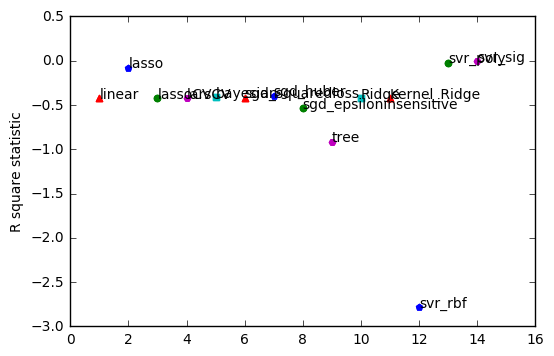

In [32]:
plt.scatter(D[0],C[0], color='r',marker='^', alpha=1)
plt.scatter(D[1],C[1], color='b',marker='p', alpha=1)
plt.scatter(D[2],C[2], color='g',marker='o', alpha=1)
plt.scatter(D[3],C[3], color='m',marker='H', alpha=1)
plt.scatter(D[4],C[4], color='c',marker='s', alpha=1)
plt.scatter(D[5],C[5], color='r',marker='^', alpha=1)
plt.scatter(D[6],C[6], color='b',marker='p', alpha=1)
plt.scatter(D[7],C[7], color='g',marker='o', alpha=1)
plt.scatter(D[8],C[8], color='m',marker='H', alpha=1)
plt.scatter(D[9],C[9], color='c',marker='s', alpha=1)
plt.scatter(D[10],C[10], color='r',marker='^', alpha=1)
plt.scatter(D[11],C[11], color='b',marker='p', alpha=1)
plt.scatter(D[12],C[12], color='g',marker='o', alpha=1)
plt.scatter(D[13],C[13], color='m',marker='H', alpha=1)
#plt.scatter(D[14],C[14], color='m',marker='H', alpha=1)
n=['linear','lasso','lassoCV','larsCV','bayesian','sgd_squaredloss','sgd_huber','sgd_epsiloninsensitive','tree','Ridge','Kernel_Ridge','svr_rbf','svr_poly','svr_sig']
for i, txt in enumerate(n):
    plt.annotate(txt, (D[i],C[i]))
plt.ylabel('R square statistic')
plt.show()

**NEURAL NETWORK**

In [58]:
def baseline_model():
    model=Sequential()
    model.add(Dropout(0.2, input_shape=(30,)))
    model.add(Dense(26, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(17, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal'))
    # compile the model 
    epochs=94
    learning_rate=0.01
    momemtum=0.3
    sgd=SGD(lr=learning_rate, momentum=momemtum, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [62]:
seed=7
#fit and evaluate the NN
estimators=[]
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)))
pipeline=Pipeline(estimators)
kfold=KFold(n_splits=10, shuffle=True, random_state=seed)
results=cross_val_score(pipeline, x_train_norm, y_train_norm, cv=kfold, scoring='r2')
results.mean(), results.std()

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(26, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(17, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(26, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(17, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Upd

(0.42814942188741451, 0.023145844767208712)

In [63]:
results_test=cross_val_score(pipeline, x_test_norm, y_test_norm, cv=kfold, scoring='r2')
results_test.mean(), results_test.std()

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(26, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(17, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(26, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(17, kernel_initializer="normal", activation="relu")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Upd

(0.33258829816608554, 0.10316408632451363)